<h2>Coursera Data Science Capstone - Final Project Report</h2>

<h3>Mumbai Neighbourhoods</h3>

<h3>Introduction:</h3><br />
<b>A description of the problem and a discussion of the background.</b>

Kabir lives in the city of Mumbai, India. He has recently changed his job, and his new office is located almost 20 kms away from his home. This means his daily travel time is close to 3 to 4 hours, and he sees this as a waste of time and resources. <br />
Kabir wants to move closer to his office. He currently stays in the neighbourhood of Tardeo, which is in South Mumbai. And his office is in Andheri, which is in north Mumbai. He doesn’t wish to stay in Andheri because it is a commercial neighbourhood, but needs to move top a neighbourhood closer to his workplace. 
Kabir has shortlisted 5 neighbourhoods that he wishes to explore. He likes his current neighbourhood and the mix of lifestyle options it presents, and hopes to move to one that is similar in character and composition to his current neighbourhood of Tardeo. 

The problem we are looking to solve:: Which Mumbai neighbourhoods in his shortlist or otherwise come close to his current neighbourhood of Tardeo, in terms of their composition and character? <br />
While this particular problem is specific to Kabir’s requirement, the solution needs to cater to other similar cases which require segmenting Mumbai neighbourhoods based on broad lifestyle options. 

<b>A description of the data and how it will be used to solve the problem.</b>

To address this problem, we need:<br />
a. Geographical Data of Mumbai neighbourhoods - latitude and longitude details of neighbourhoods in Mumbai
b. Location Data for Mumbai neighbourhoods - data describing places and venues, such that if one has the geographical data or coordinates of a place, one can determine what the neighbourhood of that point looks like, that is what kind of venues are there in a given radius

a. Geographical Data of Mumbai neighbourhoods: <br />
For the latitude and longitude coordinates of Mumbai neighbourhoods, our primary source of information is the following Wikipedia page: https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Mumbai <br />
This wiki page comprises a list of links to 136 Mumbai neighbourhoods. eg. Kabir's current neighbourhood of Tardeo is given in the following link: https://en.wikipedia.org/wiki/Tardeo. Each of the location pages contains the latitude and longitude of that particular location. The wiki page for Tardeo has information about Tardeo’s lat long details - 18.969 N, 72.813 E. <br />
Hence we can compile a database of 138 neighbourhoods in Mumbai from these wiki pages, using a web-scraping tool like <b>BeautifulSoup</b>. 
<br /><br />
b. Location Data: <br />
For neighbourhood location details, we use the <b>Foursquare</b> database. Since we are interested in the character and composition of each neighbourhood, we use the ‘explore’ endpoint to learn about the popular venues in each neighbourhood. 
<br /><br />
We will fetch similar locational data for the neighbourhoods that Kabir has shortlisted, as well as for all the neighbourhoods in Mumbai. We will then process the venue details through k-means clustering to form groups of neighbourhoods with similar flavour. 

<br />

<h3>Methodology Section</h3><br />
<b>Methodology Part 1: </b><br />
Preprocessing of the geographical data - obtaining and formatting latitude and longitude data for Mumbai neighbourhoods

We start with the following site:  https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Mumbai : this is a Wikipedia page that lists out 138 neighbourhoods in Mumbai. Each neighbourhood has a corresponding wikipedia link, which in turn contains the latitude-longitude coordinates of the specific neighbourhood. 
We parse the page through BeautifulSoup and fetch the names and links corresponding to each neighbourhood listed on the page. We then create a dataframe with the details. 

<table style="box-sizing: border-box; border-collapse: collapse; border-spacing: 0px; background-color: rgb(255, 255, 255); border: none; color: rgb(0, 0, 0); font-size: 12px; table-layout: fixed; font-family: &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-variant-ligatures: normal; font-variant-caps: normal; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px;" border="1"><colgroup><col/><col/><col/></colgroup><tbody style="box-sizing: border-box;"><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none;"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div><br/></div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div><span style="font-weight: bold; font-size: 12px;">hood</span></div></td><td><div><span style="font-size: 12px;">link</span></div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: rgb(245, 245, 245);"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>0</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Aarey Milk Colony </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div><a href="https://en.wikipedia.org/wiki/Aarey_Milk_Colony">https://en.wikipedia.org/wiki/Aarey_Milk_Colony</a> </div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none;"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>1</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Agripada </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div><a href="https://en.wikipedia.org/wiki/Agripada">https://en.wikipedia.org/wiki/Agripada</a> </div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: rgb(245, 245, 245);"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>2</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Altamount Road </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div><a href="https://en.wikipedia.org/wiki/Altamount_Road">https://en.wikipedia.org/wiki/Altamount_Road</a> </div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none;"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>3</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Amboli, Mumbai </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div><a href="https://en.wikipedia.org/wiki/Amboli,_Mumbai">https://en.wikipedia.org/wiki/Amboli,_Mumbai</a> </div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: rgb(245, 245, 245);"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>4</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Amrut Nagar </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div><a href="https://en.wikipedia.org/wiki/Amrut_Nagar">https://en.wikipedia.org/wiki/Amrut_Nagar</a> </div></td></tr></tbody></table>

We then process the neighbourhoods dictionary to visit each wiki page, and fetch the corresponding co-ordinates using BeautifulSoup, and build another dataframe:

<table style="box-sizing: border-box; border-collapse: collapse; border-spacing: 0px; background-color: rgb(255, 255, 255); border: none; color: rgb(0, 0, 0); font-size: 12px; table-layout: fixed; font-family: &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-variant-ligatures: normal; font-variant-caps: normal; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px;" border="1"><colgroup><col/><col/><col/><col/></colgroup><tbody style="box-sizing: border-box;"><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none;"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div><br/></div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>neighborhood</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>latitude</div></td><td><div><span style="font-weight: bold;">longitude</span></div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: rgb(245, 245, 245);"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>0</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Zaveri Bazaar </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>18.951808 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.830697 </div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none;"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>1</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Walkeshwar </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>18.9475964 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.7959574 </div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: rgb(245, 245, 245);"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>2</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Wadala </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>19.021632 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.86459 </div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none;"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>3</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Virar </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>19.47 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.8 </div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: rgba(66, 165, 245, 0.2);"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>4</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Vidyavihar </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>19.080 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.89 </div></td></tr></tbody></table>

The last stage is to build a consolidated dataframe, and save it as a CSV file for the next round of processing. 

<table style="border-collapse: collapse; border-spacing: 0px; background-color: rgb(255, 255, 255); border: none; font-size: 12px; table-layout: fixed; orphans: 2; widows: 2;" border="1"><colgroup><col/><col/><col/><col/><col/></colgroup><tbody><tr style="text-align: right; vertical-align: middle; padding: 0.5em; max-width: none; border: none; background-color: rgb(245, 245, 245);"><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal; font-weight: bold;">0</span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">Zaveri Bazaar </span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">18.951808 </span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">72.830697 </span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><a href="https://en.wikipedia.org/wiki/Zaveri_Bazaar" style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">https://en.wikipedia.org/wiki/Zaveri_Bazaar</a><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;" /></div></td></tr><tr style="text-align: right; vertical-align: middle; padding: 0.5em; max-width: none; border: none;"><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal; font-weight: bold;">1</span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">Walkeshwar </span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">18.9475964 </span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">72.7959574 </span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><a href="https://en.wikipedia.org/wiki/Walkeshwar" style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">https://en.wikipedia.org/wiki/Walkeshwar</a><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;" /></div></td></tr><tr style="text-align: right; vertical-align: middle; padding: 0.5em; max-width: none; border: none; background-color: rgb(245, 245, 245);"><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal; font-weight: bold;">2</span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">Wadala </span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">19.021632 </span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">72.86459 </span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><a href="https://en.wikipedia.org/wiki/Wadala" style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">https://en.wikipedia.org/wiki/Wadala</a><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;" /></div></td></tr><tr style="text-align: right; vertical-align: middle; padding: 0.5em; max-width: none; border: none;"><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal; font-weight: bold;">3</span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">Virar </span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">19.47 </span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">72.8 </span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><a href="https://en.wikipedia.org/wiki/Virar" style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">https://en.wikipedia.org/wiki/Virar</a><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;" /></div></td></tr><tr style="text-align: right; vertical-align: middle; padding: 0.5em; max-width: none; border: none; background-color: rgba(66, 165, 245, 0.2);"><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal; font-weight: bold;">4</span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">Vidyavihar </span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">19.080 </span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><span style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">72.896 </span></div></td><td style="padding: 0.5em; vertical-align: middle; border: none;"><div><a href="https://en.wikipedia.org/" style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-variant-ligatures: normal; line-height: normal;">https://en.wikipedia.org/</a></div></td></tr></tbody></table>

We also visualise the dataset of Mumbai neighbourhoods in the form of a Map using the pandas ‘folium’ library.

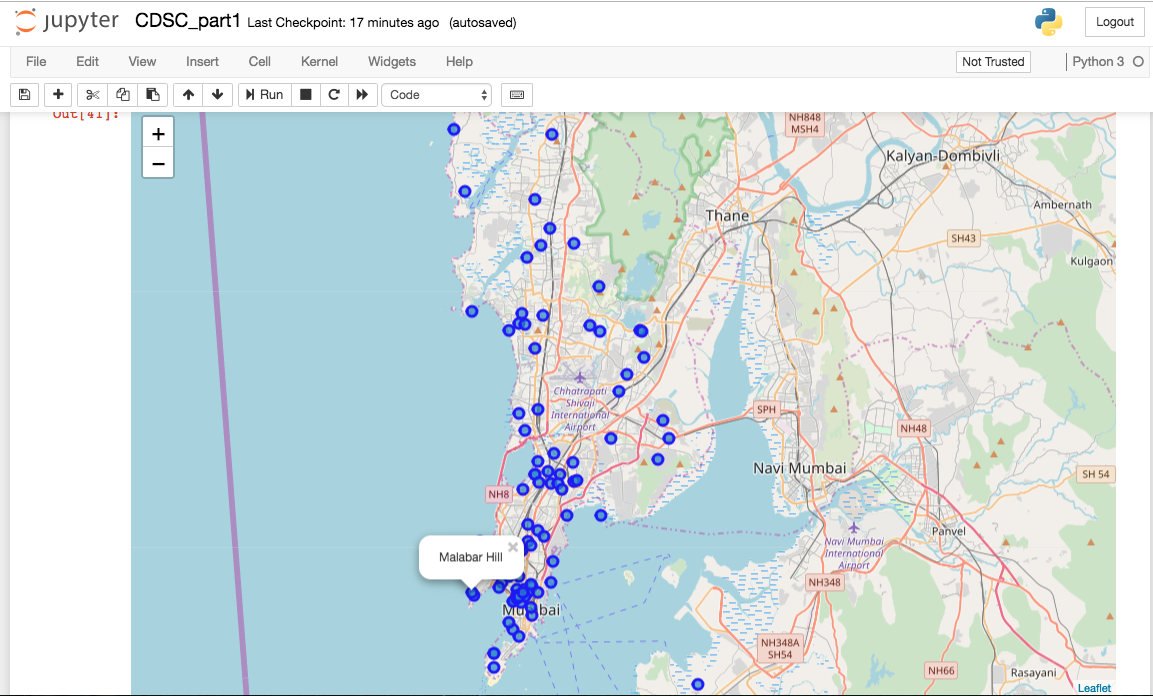

<b>Methodology Part 2:</b><br />
Now that we have our required neighbourhoods list as well as their corresponding latitude-longitude details, we can work with Foursquare to get details and form a better understanding of the neighbourhoods. 
We want a general sense of the lifestyle of these neighbourhoods. So we will use the ‘explore’ endpoint in our Foursquare API calls to get a list of the popular hangouts in our neighbourhoods. 

We start by importing the csv file created in the Part 1 of the process, and convert that into a dataframe of all the neighbourhoods in Mumbai. 

<b>Round 1 - We explore Kabir’s current neighbourhood, Tardeo. </b><br />
We pass Tardeo’s coordinates to Foursquare and get the list of popular hangouts in the 500 metres radius of the neighbourhoods as an exploratory exercise. We get a list such as:

<table style="box-sizing: border-box; border-collapse: collapse; border-spacing: 0px; background-color: rgb(255, 255, 255); border: none; color: rgb(0, 0, 0); font-size: 12px; table-layout: fixed; font-family: &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-variant-ligatures: normal; font-variant-caps: normal; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px;" border="1"><colgroup><col/><col/><col/><col/><col/><col/></colgroup><tbody style="box-sizing: border-box;"><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none;"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"/><td><div>name</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>categories</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>lat</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>lng</div></td><td><div><br/></div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: rgb(245, 245, 245);"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>0</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Swati Snacks </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Indian Restaurant </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>18.966442 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.813531 </div></td><td><div><br/></div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none;"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>1</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Theobroma </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Bakery </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>18.970735 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.809816 </div></td><td><div><br/></div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: rgb(245, 245, 245);"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>2</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Chinese Palace </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Chinese Restaurant </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>18.972650 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.814187 </div></td><td><div><br/></div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none;"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>3</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Sardar Pav Bhaji </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Snack Place </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>18.969740 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.815221 </div></td><td><div><br/></div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: rgba(66, 165, 245, 0.2);"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>4</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Oh! Calcutta </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Bengali Restaurant </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>18.972468 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.815638 </div></td><td><div><br/></div></td></tr></tbody></table>

<b>Round 2 </b>- Since Kabir has shortlisted 5 neighbourhoods, we start with only those neighbourhoods (plus his current neighbourhood) for the first round of our further processing. 
We create a subset of our neighbourhoods data frame, and create a new one: mum_hood_shortlist

<table style="box-sizing: border-box; border-collapse: collapse; border-spacing: 0px; background-color: rgb(255, 255, 255); border: none; color: rgb(0, 0, 0); font-size: 12px; table-layout: fixed; font-family: &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-variant-ligatures: normal; font-variant-caps: normal; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px;" border="1"><colgroup><col/><col/><col/><col/><col/><col/></colgroup><tbody style="box-sizing: border-box;"><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none;"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"/><td><div>neighborhood</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>latitude</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>longitude</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>link</div></td><td><div><br/></div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: rgb(245, 245, 245);"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>6</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Tardeo </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>18.969000 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.813000 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div><a href="https://en.wikipedia.org/wiki/Tardeo">https://en.wikipedia.org/wiki/Tardeo</a> </div></td><td><div><br/></div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none;"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>10</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Shivaji Park </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>19.026724 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.838047 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div><a href="https://en.wikipedia.org/wiki/Shivaji_Park">https://en.wikipedia.org/wiki/Shivaji_Park</a> </div></td><td><div><br/></div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: rgb(245, 245, 245);"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>16</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Powai </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>19.120000 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.910000 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div><a href="https://en.wikipedia.org/wiki/Powai">https://en.wikipedia.org/wiki/Powai</a> </div></td><td><div><br/></div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none;"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>20</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Pali Hill </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>19.065870 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.826744 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div><a href="https://en.wikipedia.org/wiki/Pali_Hill">https://en.wikipedia.org/wiki/Pali_Hill</a> </div></td><td><div><br/></div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: rgb(245, 245, 245);"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>40</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Lokhandwala Complex </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>19.130815 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.829270 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div><a href="https://en.wikipedia.org/wiki/Lokhandwala_Complex">https://en.wikipedia.org/wiki/Lokhandwala_Complex</a> </div></td><td><div><br/></div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; border: none; background: rgba(66, 165, 245, 0.2);"><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none; font-weight: bold;"><div>54</div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>Four Bungalows </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>19.124714 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div>72.827210 </div></td><td style="box-sizing: border-box; padding: 0.5em; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: none;"><div><a href="https://en.wikipedia.org/wiki/Four_Bungalows">https://en.wikipedia.org/wiki/Four_Bungalows</a> </div></td><td><div><br/></div></td></tr></tbody></table>

We then pass these details to <b>Foursquare</b> with the <b>‘explore’ endpoint</b> to get a list of all the hangouts in each neighbourhood. We limit our query to a kilometre radius of each hood, and to 50 top venues. <br />
In return we get a list and details of max 50 venues per neighbourhood, which we collate in the form of a new dataframe. 
<br /><br />
We now need to explore the venue categories of each neighbourhoods, on the basis of which we will be able to cluster and explore similarity between neighbourhoods. 

Hence, using <b>One Hot Encoding</b> we further split the dataframe into multiple columns, based on venue categories. And then group each neighbourhood, with the mean value of the various categories. We then get details of the top venues of each neighbourhoods in the following form. The sequence/frequency value indicates the ranking of the categories in the neighbourhood.
<br />
eg. in the following neighbourhood, the most popular category is Pub, followed by Lounge etc.<br/><br />
<div>----Lokhandwala Complex----</div><div>                venue  freq</div><div>0                 Pub  0.14</div><div>1              Lounge  0.08</div><div>2   Indian Restaurant  0.08</div><div>3  Italian Restaurant  0.06</div><div>4                 Bar  0.06</div><div>5                Café  0.06</div><div>6         Pizza Place  0.06</div><div>7               Diner  0.04</div><div>8           Juice Bar  0.04</div><div>9           Multiplex  0.04</div><div><br/></div>

Based on the list, we create a new dataframe with the top 10 categories for each neighbourhood. This is the information on the basis of which we will cluster our neighbourhoods. 

<b>K-MEANS CLUSTERING</b><br />
Since in this round, we are only concerned with 6 neighbourhoods, we will divide the shortlisted neighbourhoods into 3 clusters. <br />
We pass the details of ranked venue categories for each neighbourhoods - based on which we use the Means algorithm to define clusters. 

<table style="border-collapse: collapse; min-width: 100%;"><colgroup><col style="width: 130px;"/><col style="width: 130px;"/><col style="width: 130px;"/></colgroup><tbody style="box-sizing: border-box; color: rgb(0, 0, 0); font-family: &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 12px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; background-color: rgb(255, 255, 255); text-decoration-style: initial; text-decoration-color: initial;"><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none;"><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; font-weight: bold; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div><br/></div></td><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; font-weight: bold; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div><span style="font-weight: bold; font-size: 12px;">neighborhood</span></div></td><td style="border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div><span style="font-size: 12px; font-weight: bold;">Cluster Labels</span></div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; background-color: rgb(245, 245, 245); background-position: initial initial; background-repeat: initial initial;"><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; font-weight: bold; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>0</div></td><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>Tardeo </div></td><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>0 </div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none;"><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; font-weight: bold; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>1</div></td><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>Shivaji Park </div></td><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>0 </div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; background-color: rgb(245, 245, 245); background-position: initial initial; background-repeat: initial initial;"><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; font-weight: bold; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>2</div></td><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>Powai </div></td><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>2 </div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none;"><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; font-weight: bold; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>3</div></td><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>Pali Hill </div></td><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>1 </div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none; background-color: rgb(245, 245, 245); background-position: initial initial; background-repeat: initial initial;"><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; font-weight: bold; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>4</div></td><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>Lokhandwala Complex </div></td><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>1 </div></td></tr><tr style="box-sizing: border-box; text-align: right; vertical-align: middle; padding: 0.5em; line-height: normal; white-space: normal; max-width: none;"><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; font-weight: bold; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>5</div></td><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>Four Bungalows </div></td><td style="box-sizing: border-box; text-align: right; vertical-align: middle; line-height: normal; white-space: normal; border: 1px solid rgb(204, 204, 204); width: 130px; padding: 8px;"><div>1 </div></td></tr></tbody></table>

Using the ‘folium’ library to visualise the clusters, we get the following:

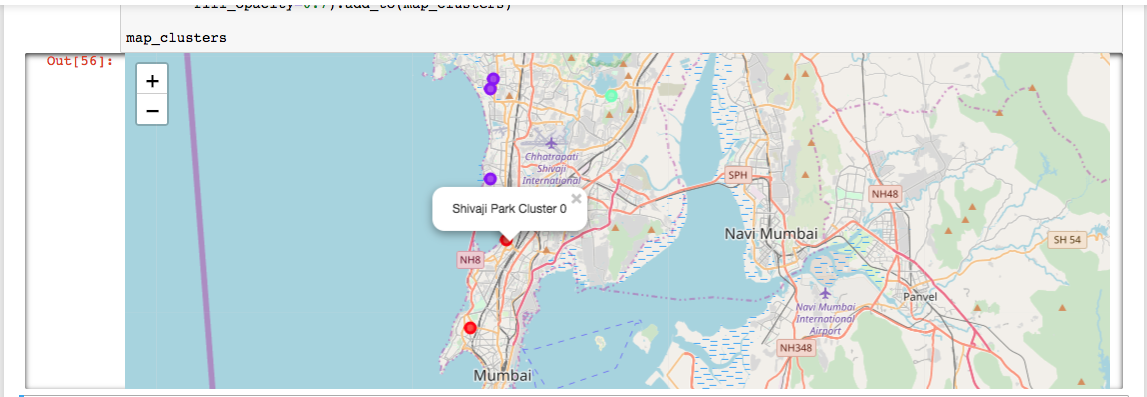

<b>Round 3 - </b><br />
Aside from Kabir's shortlisted neighbourhoods, it’ll be useful to segment all of Mumbai’s neighbourhoods. This will give Kabir a wider range of options to consider while making his decision to relocate. 
For this we repeat the steps we followed in Round 2 with all Mumbai neighbourhoods that we had compiled in the consolidated data frame. We segment Mumbai’s neighbourhoods into 6 clusters. Using Folium, we can visualise the clusters as follows:

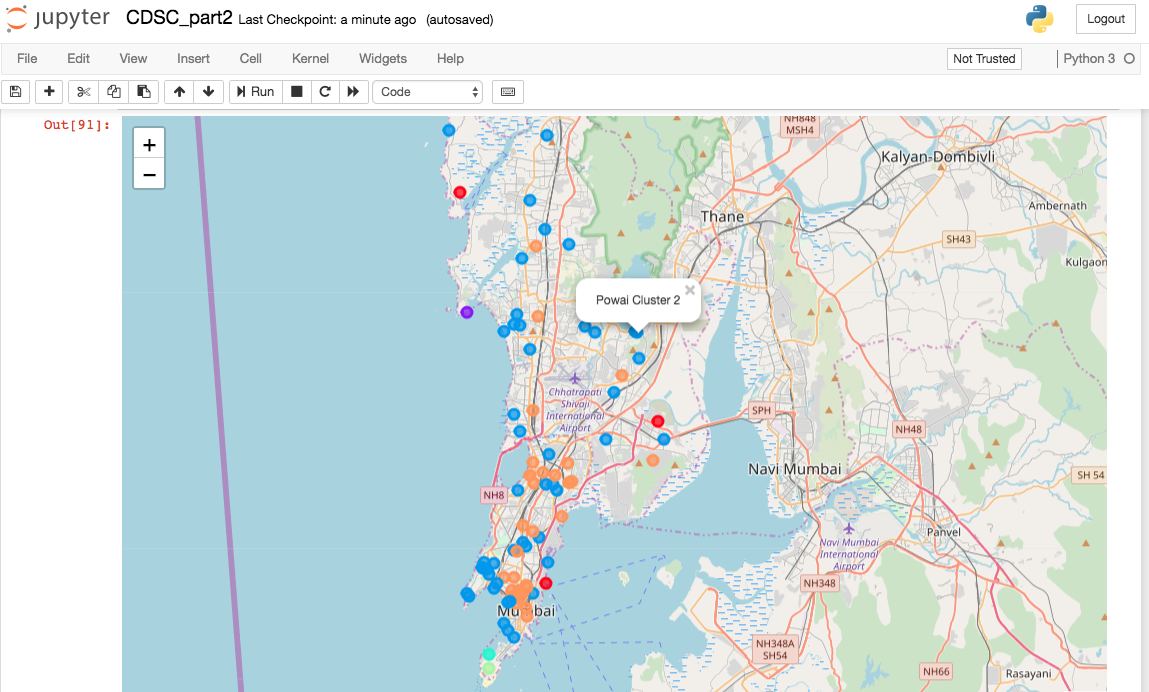

<h3>Discussion Section:</h3><br/>
Using KMeans to cluster the shortlisted as well as Mumbai’s other neighbourhoods, Kabir will have some insights into the character of the neighbourhoods based on the lifestyle of each neighbourhood - reflected in the popular hangouts of each neighbourhood. <br/>
As per the exercise, <b>the nieghbourhood of Shivaji Park comes closest to his current neighbourhood</b> in terms of character and composition. That said, of all his shortlisted options, this neighbourhood is still the farthest away from his workplace. Since his first consideration was to reduce his travel time, he might want to assess a few more neighbourhoods. <br/>
He can consider other similar neighbourhoods from the larger cluster of Mumbai neighbourhoods that were generated in Round 3. He can further reduce the clusters and/or add more neighbourhoods to the shortlist - and run the same process again. 


<h3>Conclusion:</h3><br/>
While we approached this exercise to address Kabir's specific problem, the process can be generalised to gain insights on Mumbai’s neighbourhoods based on many other parameters. <br/>
The csv file (Mumbai_Hood_LL.csv) that was generated in the preprocessing part of the exercise, compiles a hundred Mumbai neighbourhood latitude and longitude details - this can serve as a locational input for other such exercises. 